In [1]:
%matplotlib inline

import matplotlib
matplotlib.use('Agg')

from matplotlib import rc
rc('text', usetex=False)
matplotlib.rcParams['svg.fonttype'] = 'none'
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

import matplotlib.patches as patches
from collections import OrderedDict, defaultdict
import seaborn as sns
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4)

from tqdm import tnrange, tqdm_notebook
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


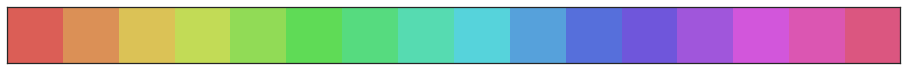

In [2]:
sns.set_style("white")
sns.set_context("talk", font_scale=1.4)

sns.palplot(sns.color_palette("hls", 16))
colors = sns.color_palette("hls", 16)
density_colors = [colors[0], colors[9], 'black']

In [3]:
import matplotlib

def plot_heatmap(df, font_size=8):
    sns.set(font_scale=1)
    r1 = df.iloc[:,:350]
    r2 = df.iloc[:,350:700]
    r3 = df.iloc[:,700:1050]
    r4 = df.iloc[:,1050:]
    vmin = min(df.min())
    vmax = max(df.max())
    regions = [r1, r2, r3, r4]

    gs_hm = gridspec.GridSpec(
                ncols=4, nrows=1, width_ratios=[1, 1, 1, 1]
    )
    f = plt.figure(figsize=(4, 2))
    plot_axs = []
    
    for i in range(0, 4):
        plot_axs.append(f.add_subplot(gs_hm[i]))
        
        if i < 3:
            """
            plt.pcolor(
                regions[i],
                vmin=vmin,
                vmax=vmax
            )
            """
            sns.heatmap(
                regions[i], 
                xticklabels=False, 
                yticklabels=False, 
                ax=plot_axs[i], 
                vmin=vmin, 
                vmax=vmax,
                cbar=False,
            )
        else:
            cb = matplotlib.colorbar.ColorbarBase(ax=plot_axs[i], )
            cb.ax.tick_params(labelsize=font_size)
            """
            plt.pcolor(
                regions[i],
                vmin=vmin,
                vmax=vmax,
                cbar=True
            )
            """
            sns.heatmap(
                regions[i], 
                xticklabels=False, 
                yticklabels=False, 
                ax=plot_axs[i], 
                vmin=vmin, 
                vmax=vmax,
                # cbar=True,
            )
            plot_axs[i].tick_params(labelsize=font_size)
    
    
    """
    sns.heatmap(
        regions[3], 
        xticklabels=False, 
        yticklabels=False, 
        ax=plot_axs[3], 
        vmin=vmin, 
        vmax=vmax,
        cbar=cb
    )
    """


In [4]:
def _get_means_and_sems(df, conf=0.95):
    """
    Sets the means and standard error values after outlier
    removal. Replaces remove_outliers.

    Parameters
    ----------
    df : pandas.DataFrame
        table of densities or values
    conf : float
        keep {conf}% of densities present at every given position

    Returns
    -------

    means : list
        mean value for each position in the dataframe df
    sems : list
        standard error of the mean
    """

    merged = pd.DataFrame(index=df.index)
    progress = tnrange(df.shape[1])
    for col, row in df.iteritems():
        single_col = df[col].dropna()
        single_col = single_col.sort_values()
        nums = len(single_col)
        droppercent = (1 - conf) / 2.0
        dropnum = int(nums * droppercent)
        if dropnum > 0:
            single_col = single_col[dropnum:-dropnum]
        merged = pd.merge(merged, pd.DataFrame(single_col), how='left', left_index=True, right_index=True)
        progress.update(1)
    return merged

# Plot the heatmap of both the normalized densities with and without outlier removal (for excluded upon KD events):

In [5]:
wd = '/home/bay001/projects/gabe_qc_20170612/data/'
conf_1 = '203_02_HNRNPC.merged.r2.2.conf1.HNRNPC-BGHLV20-HepG2-excluded-upon-knockdown.normed_matrix.txt'
conf1_df = pd.read_table(os.path.join(wd,conf_1), sep=',', index_col=0)
merged = _get_means_and_sems(conf1_df)

/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


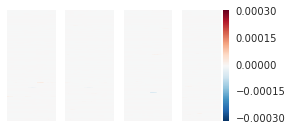

In [6]:
# Plots the non-outlier-removed heatmap (see how a few signals dominate the global heatmap?)
plot_heatmap(conf1_df.fillna(0))
plt.savefig(
    '/home/bay001/projects/gabe_qc_20170612/analysis/203_02_HNRNPC_heatmap_excl_on_kd_keep_outliers.pdf',
    rasterized=True
)
# plt.cla()
# plt.clf()

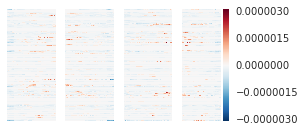

In [7]:
# Plots the outlier-removed heatmap (see how more global signal shows up?)
plot_heatmap(merged.fillna(0))
plt.savefig(
    '/home/bay001/projects/gabe_qc_20170612/analysis/203_02_HNRNPC_heatmap_excl_on_kd_remove_outliers.pdf',
    rasterized=True
)
# plt.cla()
# plt.clf()

# Plot the heatmap of both the normalized densities with and without outlier removal (for included upon KD events):

In [8]:
wd = '/home/bay001/projects/gabe_qc_20170612/data/'
conf_1 = '203_02_HNRNPC.merged.r2.2.conf1.HNRNPC-BGHLV20-HepG2-included-upon-knockdown.normed_matrix.txt'
conf_095 = '203_02_HNRNPC.merged.r2.2.conf0.95.HNRNPC-BGHLV20-HepG2-included-upon-knockdown.normed_matrix.txt'

In [9]:
conf1_df = pd.read_table(os.path.join(wd,conf_1), sep=',', index_col=0)
conf095_df = pd.read_table(os.path.join(wd,conf_095), sep=',', index_col=0)

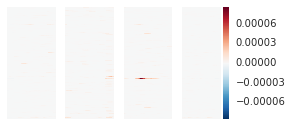

In [10]:
# Plots the non-outlier-removed heatmap (see how a few signals dominate the global heatmap?)
plot_heatmap(conf1_df.dropna())
plt.savefig(
    '/home/bay001/projects/gabe_qc_20170612/analysis/203_02_HNRNPC_heatmap_incl_on_kd_keep_outliers.pdf',
    rasterized=True
)
# plt.cla()
# plt.clf()

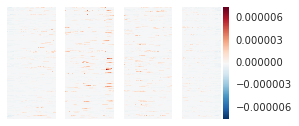

In [11]:
# Plots the outlier-removed heatmap (see how more global signal shows up?)
merged = _get_means_and_sems(conf095_df)
plot_heatmap(merged.fillna(0))
plt.savefig(
    '/home/bay001/projects/gabe_qc_20170612/analysis/203_02_HNRNPC_heatmap_incl_on_kd_remove_outliers.pdf',
    rasterized=True
)
# plt.cla()
# plt.clf()

# Plot the companion RBP map
- hopefully these are the same size/dimensions as their respective heatmaps, so that they can be easily lined up in a figure :) 

In [12]:
import sys
sys.path.insert(0, '/home/bay001/projects/codebase/rbp-maps/maps/')
from density import Map
from density import ReadDensity
from density import normalization_functions
from density import RDPlotter
from density import LineObject as dline

In [13]:
density_dir = '/home/bay001/projects/gabe_qc_20170612/data/'

hnrnpc_density_included = os.path.join(density_dir, '203_02_HNRNPC.merged.r2.2.conf1.HNRNPC-BGHLV20-HepG2-included-upon-knockdown.normed_matrix.txt')
hnrnpc_density_excluded = os.path.join(density_dir, '203_02_HNRNPC.merged.r2.2.conf1.HNRNPC-BGHLV20-HepG2-excluded-upon-knockdown.normed_matrix.txt')
hnrnpc_density_native_cass = os.path.join(density_dir, '203_02_HNRNPC.merged.r2.2.HepG2_native_cassette_exons.normed_matrix.txt')

In [14]:
entropy = defaultdict(dict)
subtraction = defaultdict(dict)

entropy['included'] = {
    'matrix':hnrnpc_density_included,
    'color':density_colors[0]
}
entropy['excluded'] = {
    'matrix':hnrnpc_density_excluded,
    'color':density_colors[1]
}
entropy['background'] = {
    'matrix':hnrnpc_density_native_cass,
    'color':density_colors[2]
}

In [15]:
d = entropy

density_incl = dline.LineObject(
    event_matrix=pd.read_table(d['included']['matrix'], sep=',', index_col=0),
    annotation='Included upon knockdown',
    conf=1,
    color=d['included']['color'],
    min_event_threshold=100
)
density_excl = dline.LineObject(
    event_matrix=pd.read_table(d['excluded']['matrix'], sep=',', index_col=0),
    annotation='Excluded upon knockdown',
    conf=1,
    color=d['excluded']['color'],
    min_event_threshold=100
)
density_bg = dline.LineObject(
    event_matrix=pd.read_table(d['background']['matrix'], sep=',', index_col=0),
    annotation='Native cassettes',
    conf=1,
    color=d['background']['color'],
    min_event_threshold=100
)

((492, 1400), 'Included upon knockdown (492 events)')
((476, 1400), 'Excluded upon knockdown (476 events)')
((2555, 1400), 'Native cassettes (2555 events)')


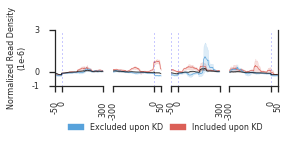

In [16]:
# plot once with the axes labels
import matplotlib.patches as mpatches

FONTSIZE=8

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(4, 1))

axs = [ax1, ax2, ax3, ax4]

RDPlotter.plot_se([density_incl, density_excl, density_bg], axs, density_colors) # density_bg
ax1.set_ylabel("Normalized Read Density\n(1e-6)", size=FONTSIZE)

# plt.tight_layout()
for ax in axs:
        ax.tick_params(labelsize=FONTSIZE)

ax1.yaxis.set_ticks([-0.000001, 0, 0.000003])
ax2.yaxis.set_ticks([-0.000001, 0, 0.000003])
ax3.yaxis.set_ticks([-0.000001, 0, 0.000003])
ax4.yaxis.set_ticks([-0.000001, 0, 0.000003])

ax1.yaxis.set_ticklabels(['-1','0','3'])

for ax in axs[1:3]:
    sns.despine(ax=ax, top=True, left=True, right=True)
    
sns.despine(ax=axs[0], top=True, left=False, right=True)
sns.despine(ax=axs[3], top=True, left=True, right=False)
    
incl_density_patch = mpatches.Patch(color=d['included']['color'], label='Included upon KD')
excl_density_patch = mpatches.Patch(color=d['excluded']['color'], label='Excluded upon KD')

leg = axs[0].legend(
    bbox_to_anchor=(2.3, -0.6), loc=1, mode="expand",
    handles=[incl_density_patch, excl_density_patch],
    borderaxespad=0., ncol=2, fontsize=FONTSIZE
)
plt.savefig('/home/bay001/projects/gabe_qc_20170612/analysis/203_02_HNRNPC_splicemap_keep_outliers.svg')


# change conf to 0.95

In [17]:
d = entropy

density_incl = dline.LineObject(
    event_matrix=pd.read_table(d['included']['matrix'], sep=',', index_col=0),
    annotation='Included upon knockdown',
    conf=0.95,
    color=d['included']['color'],
    min_event_threshold=100
)
density_excl = dline.LineObject(
    event_matrix=pd.read_table(d['excluded']['matrix'], sep=',', index_col=0),
    annotation='Excluded upon knockdown',
    conf=0.95,
    color=d['excluded']['color'],
    min_event_threshold=100
)
density_bg = dline.LineObject(
    event_matrix=pd.read_table(d['background']['matrix'], sep=',', index_col=0),
    annotation='Native cassettes',
    conf=0.95,
    color=d['background']['color'],
    min_event_threshold=100
)

((492, 1400), 'Included upon knockdown (492 events)')
((476, 1400), 'Excluded upon knockdown (476 events)')
((2555, 1400), 'Native cassettes (2555 events)')


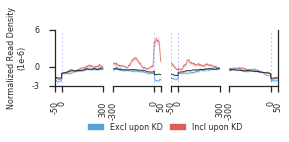

In [18]:
# plot once with the axes labels
import matplotlib.patches as mpatches

FONTSIZE=8

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(4, 1))

axs = [ax1, ax2, ax3, ax4]

RDPlotter.plot_se([density_incl, density_excl, density_bg], axs, density_colors) # density_bg
ax1.set_ylabel("Normalized Read Density\n(1e-6)", size=FONTSIZE)

# plt.tight_layout()
for ax in axs:
        ax.tick_params(labelsize=FONTSIZE)

ax1.yaxis.set_ticks([-0.0000003, 0, 0.0000006])
ax2.yaxis.set_ticks([-0.0000003, 0, 0.0000006])
ax3.yaxis.set_ticks([-0.0000003, 0, 0.0000006])
ax4.yaxis.set_ticks([-0.0000003, 0, 0.0000006])

ax1.yaxis.set_ticklabels(['-3','0','6'])

for ax in axs[1:3]:
    sns.despine(ax=ax, top=True, left=True, right=True)
    
sns.despine(ax=axs[0], top=True, left=False, right=True)
sns.despine(ax=axs[3], top=True, left=True, right=False)
    
# ax1.yaxis.set_ticklabels(['-3e-7','','',0,'','','','','','6e-7'])

incl_density_patch = mpatches.Patch(color=d['included']['color'], label='Incl upon KD')
excl_density_patch = mpatches.Patch(color=d['excluded']['color'], label='Excl upon KD')

leg = axs[0].legend(
    bbox_to_anchor=(2.3, -0.6), loc=1, mode="expand",
    handles=[incl_density_patch, excl_density_patch],
    borderaxespad=0., ncol=2, fontsize=FONTSIZE
)
plt.savefig('/home/bay001/projects/gabe_qc_20170612/analysis/203_02_HNRNPC_splicemap_remove_outliers.svg')